In [14]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import xlrd

In [15]:
df_excel = pd.read_excel('/Users/Jia/Downloads/data_skripsi/tb/data_tb.xlsx')

Convert Datetime (TB)

In [16]:
# Mengonversi kolom 'time' ke tipe data datetime
df_excel['time'] = pd.to_datetime(df_excel['time'])

# Menambahkan kolom 'month'
df_excel['month'] = df_excel['time'].dt.month

# Menambahkan kolom 'year'
df_excel['year'] = df_excel['time'].dt.year

In [17]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   KABKOT     300 non-null    object        
 1   month      300 non-null    int32         
 2   year       300 non-null    int32         
 3   tb         300 non-null    int64         
 4   longitude  300 non-null    float64       
 5   latitude   300 non-null    float64       
 6   time       300 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(1)
memory usage: 14.2+ KB


Merapihkan Data TB 2018-2023

In [18]:
import calendar

In [19]:
# Filter for years 2018-2022
df_tb = df_excel[(df_excel['year'] >= 2018) & (df_excel['year'] <= 2022)]

# Group tb_total by KABKOT and month
tb_total = df_tb.groupby(['KABKOT', 'month'])['tb'].sum()
tb_total

KABKOT           month
JAKARTA BARAT    1        3404
                 2        2822
                 3        3223
                 4        3053
                 5        2812
                 6        2678
                 7        2851
                 8        2970
                 9        3086
                 10       3191
                 11       3231
                 12       2867
JAKARTA PUSAT    1        3100
                 2        2371
                 3        2598
                 4        2447
                 5        2199
                 6        2108
                 7        2473
                 8        2417
                 9        2348
                 10       2076
                 11       2090
                 12       1970
JAKARTA SELATAN  1        3086
                 2        2470
                 3        2809
                 4        2710
                 5        2376
                 6        2541
                 7        2793
                

Merapihkan Data PM 2.5 2018-2023

In [20]:
df_pm25 = pd.read_csv(r'/Users/Jia/Downloads/data_skripsi/PM_25/dissolved_result_pm25.csv')
df_pm25 = df_pm25.drop(['Unnamed: 0'], axis=1)
print(df_pm25.columns)

Index(['KABKOT', 'month', 'year', 'longitude', 'latitude', 'pm2p5', 'time'], dtype='object')


In [21]:
# Filter for years 2018-2022
df_pm25 = df_pm25[(df_pm25['year'] >= 2018) & (df_pm25['year'] <= 2022)]

# Group pm25_mean by KABKOT, month, and time
pm25_mean = df_pm25.groupby(['KABKOT', 'month'])['pm2p5'].mean()
pm25_mean

KABKOT           month
JAKARTA BARAT    1        38.337696
                 2        40.822498
                 3        46.289806
                 4        56.138215
                 5        61.726104
                 6        63.506840
                 7        62.563071
                 8        59.944935
                 9        58.257953
                 10       57.980536
                 11       50.096108
                 12       40.679864
JAKARTA PUSAT    1        39.852895
                 2        42.140114
                 3        48.208209
                 4        57.630826
                 5        62.867344
                 6        64.324281
                 7        62.989319
                 8        60.123346
                 9        58.634938
                 10       58.563693
                 11       51.334289
                 12       42.279933
JAKARTA SELATAN  1        41.159228
                 2        43.948206
                 3        49.980532
     

Merge Files

In [22]:
# Merge DataFrames on 'KABKOT', 'month', and 'time'
df_tb_pm25 = pd.merge(tb_total, pm25_mean, on=['KABKOT', 'month'])
df_tb_pm25

tb      pm2p5
KABKOT          month                 
JAKARTA BARAT   1      3404  38.337696
                2      2822  40.822498
                3      3223  46.289806
                4      3053  56.138215
                5      2812  61.726104
                6      2678  63.506840
                7      2851  62.563071
                8      2970  59.944935
                9      3086  58.257953
                10     3191  57.980536
                11     3231  50.096108
                12     2867  40.679864
JAKARTA PUSAT   1      3100  39.852895
                2      2371  42.140114
                3      2598  48.208209
                4      2447  57.630826
                5      2199  62.867344
                6      2108  64.324281
                7      2473  62.989319
                8      2417  60.123346
                9      2348  58.634938
                10     2076  58.563693
                11     2090  51.334289
                12     1970  42.279933
JAKARTA SELATAN 1      3086  41.159228
                2      2470  43.948206
                3      2809  49.980532
                4      2710  60.546350
                5      2376  66.634001
                6      2541  68.051620
                7      2793  66.883110
                8      2691  63.420329
                9      2720  61.142997
                10     2477  60.221179
                11     2285  52.780562
                12     2155  43.467557
JAKARTA TIMUR   1      4791  41.025599
                2      3751  43.205019
                3      4836  49.547104
                4      4400  58.759083
                5      3831  63.867346
                6      3882  65.031945
                7      4265  63.443460
                8      4318  60.190828
                9      4573  58.613700
                10     3732  58.505403
                11     3475  51.884844
                12     3275  43.277942
JAKARTA UTARA   1      2541  38.066121
                2      1856  39.841571
                3      2181  45.718676
                4      2105  53.957982
                5      1941  58.365534
                6      1834  59.841367
                7      2035  58.392701
                8      2135  56.035993
                9      2135  55.185791
                10     1812  55.940724
                11     1811  49.069289
                12     1686  40.428234

In [23]:
df_tb_pm25 = df_tb_pm25.groupby(['KABKOT', 'month']).agg({'tb':'sum', 'pm2p5':'mean'}).reset_index()
# reset_index() untuk memisahkan kolom KABKOT dan month

In [24]:
df_tb_pm25

,KABKOT,month,tb,pm2p5
0,JAKARTA BARAT,1,3404,38.337696
1,JAKARTA BARAT,2,2822,40.822498
2,JAKARTA BARAT,3,3223,46.289806
3,JAKARTA BARAT,4,3053,56.138215
4,JAKARTA BARAT,5,2812,61.726104
5,JAKARTA BARAT,6,2678,63.506840
6,JAKARTA BARAT,7,2851,62.563071
7,JAKARTA BARAT,8,2970,59.944935
8,JAKARTA BARAT,9,3086,58.257953
9,JAKARTA BARAT,10,3191,57.980536


In [25]:
df_tb_pm25.shape

(60, 4)

In [26]:
#df_tb_pm25.to_csv("/Users/Jia/Downloads/data_skripsi/a_overlay/tb_pm25.csv")

Datetime edit for 'month'

In [27]:
import calendar

# Format for monthly graph
df_tb_pm25['month'] = pd.to_datetime(df_tb_pm25['month'], format='%m').dt.month_name()

# Set the ['month_name'] as an index
df_tb_pm25= df_tb_pm25.set_index('month').reset_index()

In [28]:
df_tb_pm25

,month,KABKOT,tb,pm2p5
0,January,JAKARTA BARAT,3404,38.337696
1,February,JAKARTA BARAT,2822,40.822498
2,March,JAKARTA BARAT,3223,46.289806
3,April,JAKARTA BARAT,3053,56.138215
4,May,JAKARTA BARAT,2812,61.726104
5,June,JAKARTA BARAT,2678,63.506840
6,July,JAKARTA BARAT,2851,62.563071
7,August,JAKARTA BARAT,2970,59.944935
8,September,JAKARTA BARAT,3086,58.257953
9,October,JAKARTA BARAT,3191,57.980536


Overlay layer plot for TB and PM 2.5

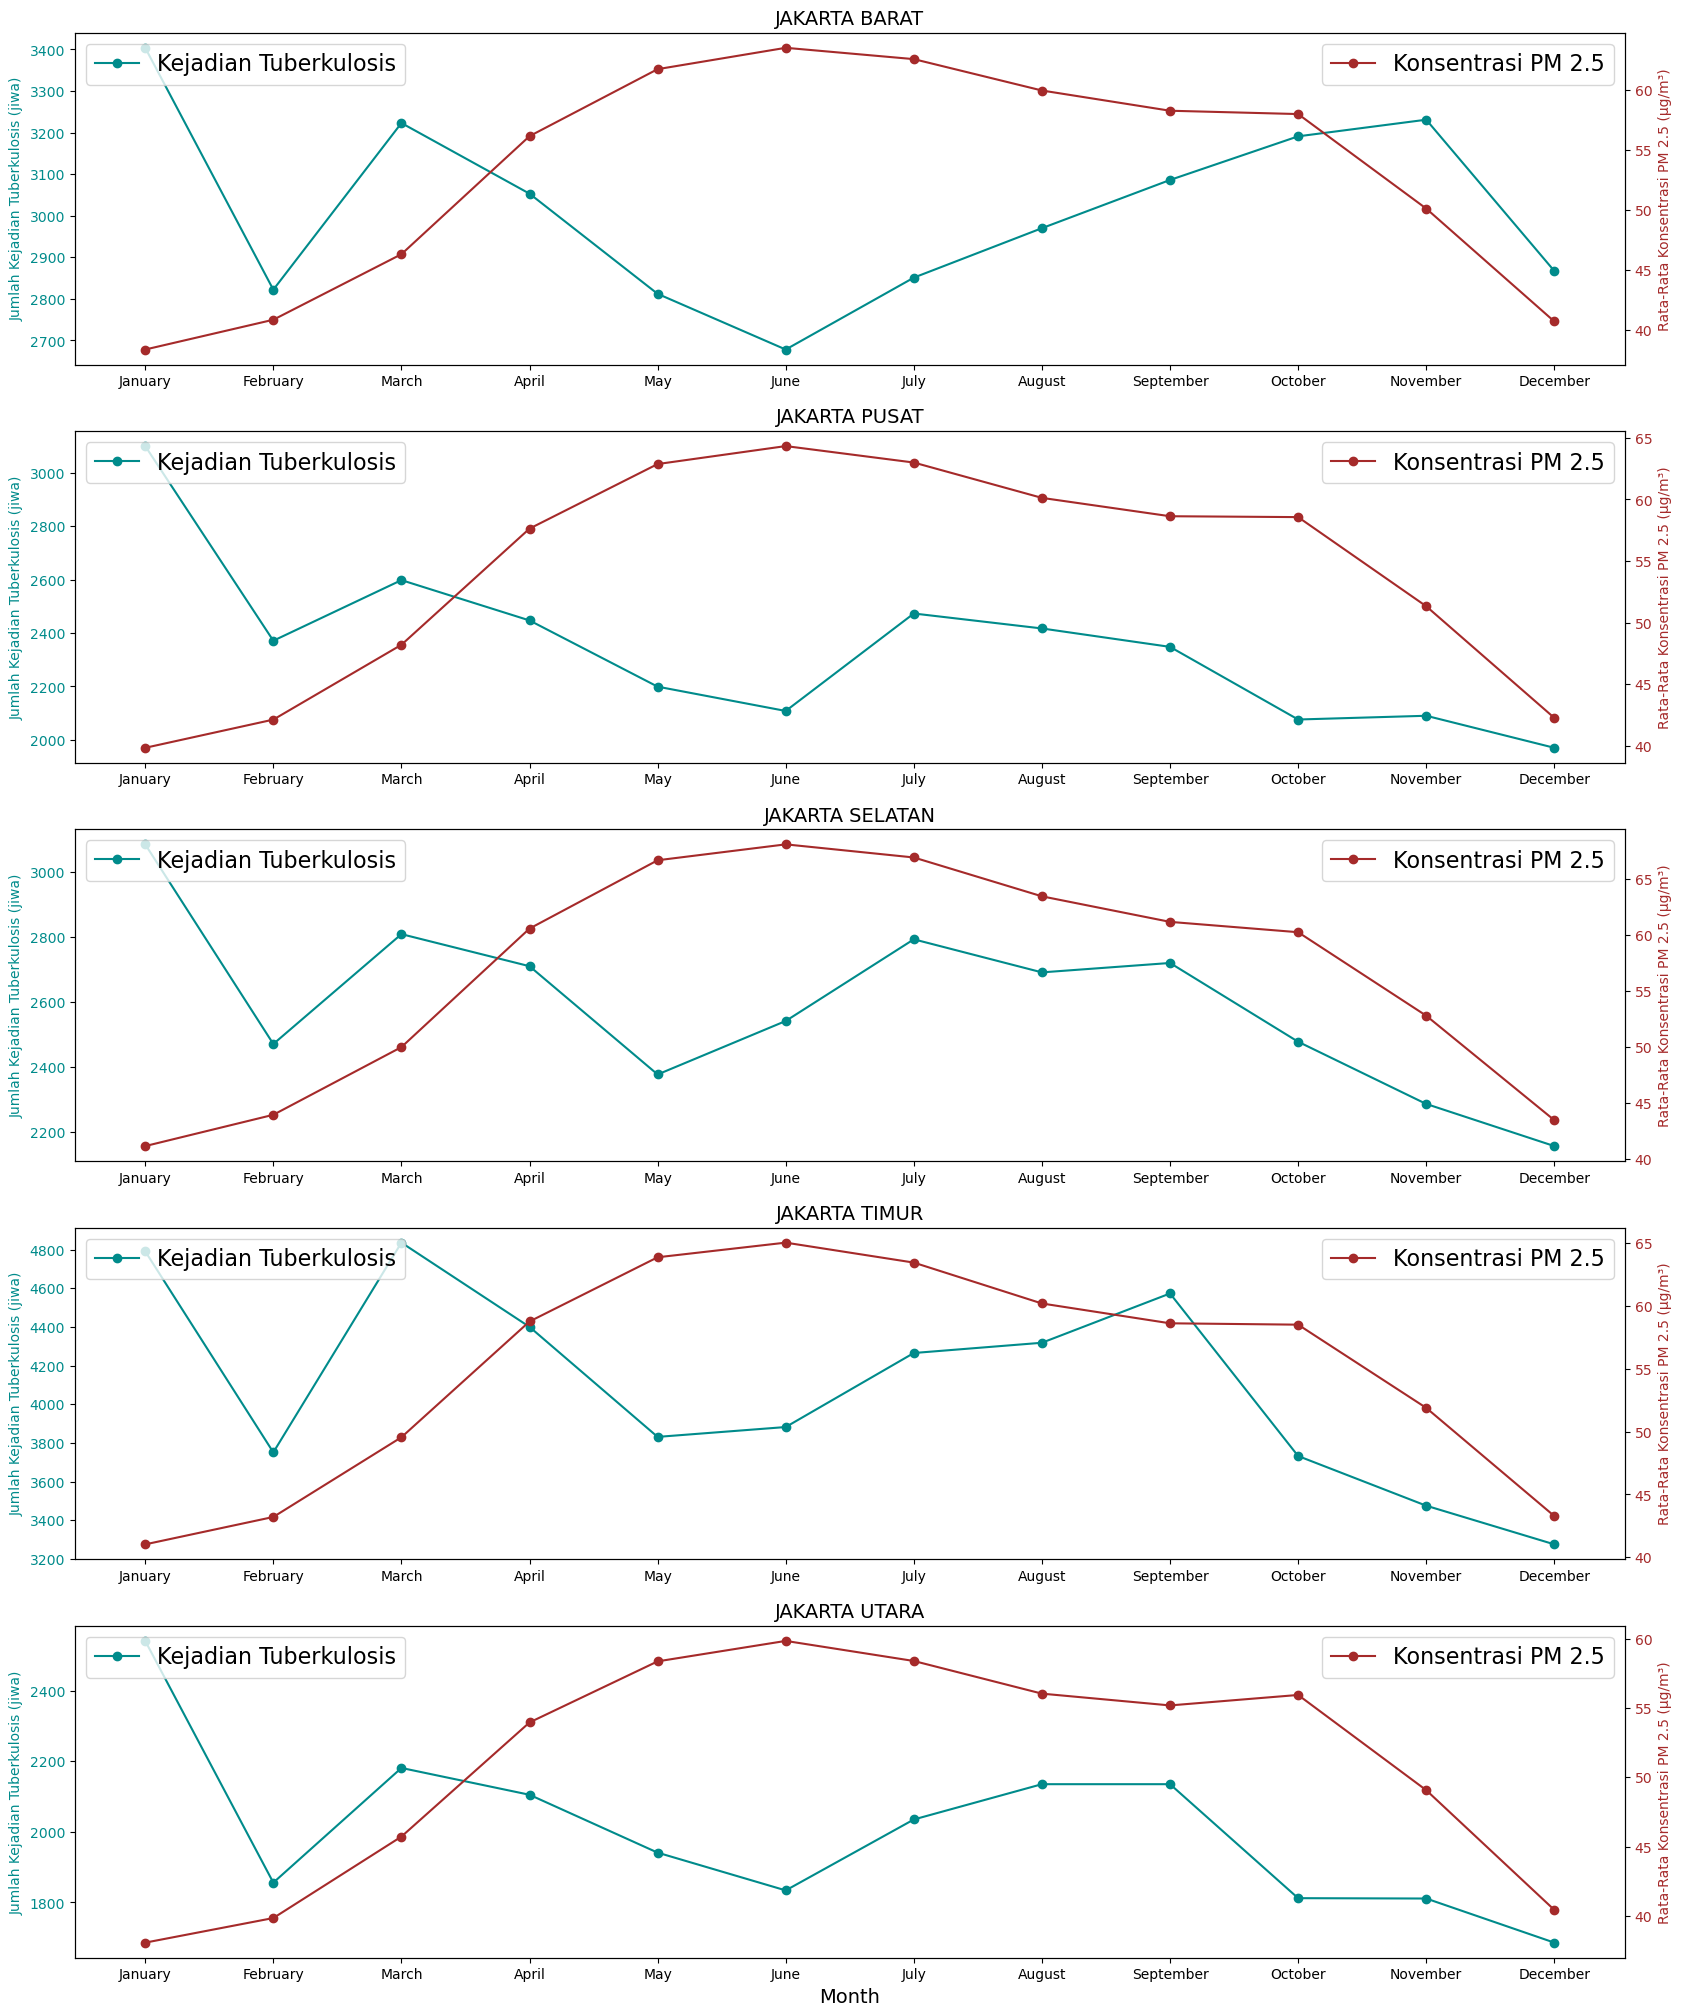

In [29]:
indicators = ['tb', 'pm2p5']

# Group data by KABKOT
grouped_data = df_tb_pm25.groupby('KABKOT')

# Plot time series for 'tb' and 'pm25' for each KABKOT
fig, axs = plt.subplots(len(grouped_data), 1, figsize=(20, len(grouped_data)*5), sharex=False, gridspec_kw={'hspace': 0.2})


for (name, group), ax in zip(grouped_data, axs):
    x = group['month']
    y1 = group['tb']
    y2 = group['pm2p5']

    ax.plot(x, y1, label='Kejadian Tuberkulosis', marker='o', color='darkcyan')
    ax.set_ylabel(f'Jumlah Kejadian Tuberkulosis (jiwa)', color='darkcyan')
    ax.tick_params(axis='y', labelcolor='darkcyan')

    ax2 = ax.twinx()
    ax2.plot(x, y2, label='Konsentrasi PM 2.5', marker='o', color='brown')
    ax2.set_ylabel(f'Rata-Rata Konsentrasi PM 2.5 (µg/m³)', color='brown')
    ax2.tick_params(axis='y', labelcolor='brown')

    ax.legend(loc= 'upper left', fontsize=16)
    ax2.legend(loc= 'upper right', fontsize=16)
    
# Add common x-axis label
axs[-1].set_xlabel('Month', fontsize= 14)
axs[-1].set_title('JAKARTA UTARA', fontsize= 14)
axs[-2].set_title('JAKARTA TIMUR',fontsize= 14)
axs[-3].set_title('JAKARTA SELATAN', fontsize= 14)
axs[-4].set_title('JAKARTA PUSAT', fontsize= 14)
axs[-5].set_title('JAKARTA BARAT', fontsize= 14)

plt.show()